## Load Data

In [1]:
!pip install python-dateutil
!pip install ipympl

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


In [3]:
import pandas as pd
import os, glob
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import datetime as date
import dateutil
import random


random.seed(123123123)

folder = "DATA\OLD"
path = os.path.join(folder, "*.csv")
all_CSVs = glob.glob(path)
#print(path)
#print(all_CSVs)
#load all dfs an merge to one

def load_df():
    df_meta = []
    all_channel_names = []
    df_meta = pd.DataFrame(df_meta)
    for csv in all_CSVs: 
        filename = os.path.basename(csv)
        if filename[-13:] == "automated.csv":
            channelName = filename.replace(filename[-14:], "")
            print(csv)
            df = pd.read_csv(csv)
            df["Channel"]= channelName
            index = [i for i in range(len(df))]
            df.set_index([index, 'Channel'], inplace= True)
            frames = [df_meta, df]
            df_meta = pd.concat(frames)
            if channelName not in all_channel_names:
                all_channel_names.append(channelName)
    return df_meta, all_channel_names
[df_meta, all_channel_names] = load_df()

Wahrheit = df_meta.loc[df_meta.index.get_level_values("Channel") == "Der Wahrheit verpflichtet"]
Schöpfer = df_meta.loc[df_meta.index.get_level_values("Channel") == "Schöpferwissen TV"]
Alles = df_meta.loc[df_meta.index.get_level_values("Channel") == "ALLESUNDNICHTS"]
Drachentöter = df_meta.loc[df_meta.index.get_level_values("Channel") == "DRACHENTÖTER TV"]
Freiheit = df_meta.loc[df_meta.index.get_level_values("Channel") == "Der Weg in deine Freiheit"]
Rettung = df_meta.loc[df_meta.index.get_level_values("Channel") == 'Rettung der Menschheit TV']
UBC = df_meta.loc[df_meta.index.get_level_values("Channel") == 'UBC TV']
VeitClub = df_meta.loc[df_meta.index.get_level_values("Channel") == 'VEIT CLUB']
df_collection = [Wahrheit, Schöpfer, Alles, Drachentöter, Freiheit, Rettung, UBC, VeitClub]


DATA\OLD\ALLESUNDNICHTS_automated.csv
DATA\OLD\Der Wahrheit verpflichtet_automated.csv
DATA\OLD\Der Weg in deine Freiheit_automated.csv
DATA\OLD\DRACHENTÖTER TV_automated.csv
DATA\OLD\Rettung der Menschheit TV_automated.csv
DATA\OLD\UBC TV_automated.csv
DATA\OLD\VEIT CLUB_automated.csv


## UTILS

In [ ]:
#get only one channel
df_meta.loc[df_meta.index.get_level_values("Channel") == "Schöpferwissen TV"]
#print(df_meta.loc["title", "Chronische Dummheit - Die Lösung für die Genesung"])


## Compare Channels Time

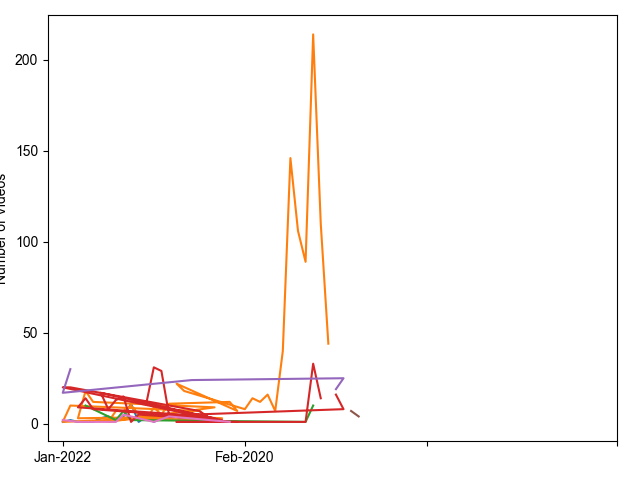

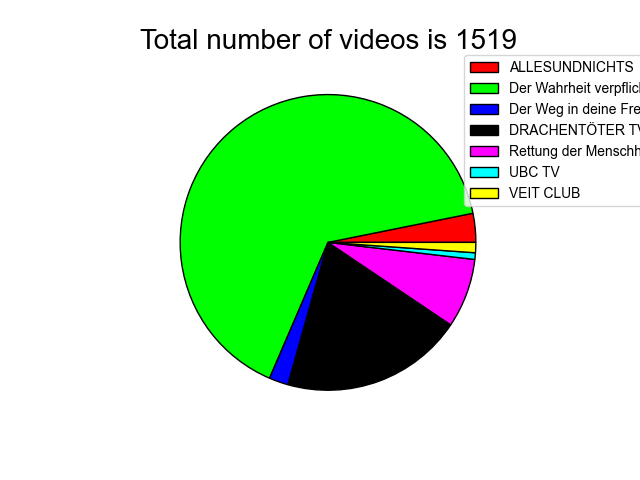

In [4]:


Title = "Total number of videos is "+ str(len(df_meta))  
#TO ADD letztes Upload              
number_of_vids =[]
for name in all_channel_names:
    number_of_vids.append(len(df_meta.loc[df_meta.index.get_level_values("Channel") == name]));
cumsum = np.cumsum(number_of_vids)
explode = [0.1]*8
              
colors = np.array([[1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 1],
                    [0, 0, 0],
                    [1, 0, 1],
                    [0, 1, 1],
                  [1,1,0],
                  [1,0.5,0]])

Title = "Total number of videos is "+ str(len(df_meta)) 
fi1, ax1 = plt.subplots(nrows=1, ncols =1)
fi2, ax2 = plt.subplots(nrows=1, ncols =1)
#ax1.title(Title)
ax1.set_title(Title, loc="center",fontsize=20)
ax1.pie(number_of_vids, radius=1, wedgeprops={ "edgecolor": "black"}, textprops={'fontsize': 11}, colors= colors )
ax1.legend(all_channel_names, bbox_to_anchor=(0.85,1.025), loc="upper left")

for channel in all_channel_names:
    df = df_meta.loc[df_meta.index.get_level_values("Channel") == channel]
    ax2.plot(df.groupby(pd.to_datetime(df["publish_date"]).dt.strftime('%b-%Y'), sort=False
              )["title"].size())
#df.groupby(pd.to_datetime(df['Date']).dt.strftime('%b-%Y'), sort=False)['Rep'].size().plot()
#ax2.plot()
plt.style.use("seaborn")
plt.tight_layout()
plt.xticks([0,24,48,73])
plt.ylabel("Number of Videos")
plt.show()

In [ ]:
from datetime import datetime
[df, all_channels] = load_df()

list_of_date =[]
list_of_list = []
now = datetime.now()
for df in df_collection:
    for p_date in df["publish_date"]:
        dt = datetime.strptime(p_date, '%Y-%m-%d')
        diff  = (now - dt)

        list_of_date.append(int(diff.days)*-1)
        #print(type(diff.days))
    #list_of_list.append(list_of_date)
    list_of_list.append(list_of_date)
    list_of_date = []

              
colors = np.array([[1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 1],
                    [0, 0, 0],
                    [1, 0, 1],
                    [0, 1, 1],
                  [1,1,0],
                  [1,0.5,0]])
    
#display(list_of_list)
# make data:
#date.datetime.strptime(my_date_string, '%b %d %Y %I:%M%p')
#for list in list_of_list:
    #print(list)
    #print("BUB")
x = [2, 4, 6, 8, 10, 12, 14, 16]
D= list_of_list
# plot:
fig, axx = plt.subplots()
print("lenght of list of list : %s" % len(list_of_list))
#colors = ['b','g','r','c', 'm','y', 'k', '']

axx.eventplot(D, orientation="horizontal",  linelengths = 0.98, color = colors )
labels = [item.get_text() for item in axx.get_xticklabels()]
labels[1] = '2015-08-07'
labels[-2] = "today"

axx.set_xticklabels(labels)

axx.legend(all_channels, bbox_to_anchor=(0., 1.0, 1., .10), loc=3,ncol=3, mode="expand", borderaxespad=0.)

#
#axx.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 3000))
plt.show()

## Video length

In [ ]:
df_meta = load_df()
df_drop = df_meta.drop('Der Wahrheit verpflichtet', level=1)
count = 0
list_titles = []
for title in Wahrheit["title"]: 
    #print(title)
    for titleS in df_drop["title"]:
        if title == titleS:
            count += 1
            list_titles.append(title)
            #print("doppletes Video %s" %title)            
display("Show same video titles: %s" %list_titles)

In [ ]:
counter_len = 0
[df_meta, all_channel_names] = load_df()
for length in Wahrheit["length"]:
    for lengthS in df_drop["length"]:
        if length == lengthS:
            counter_len += 1
print("Videos on other channels with same length: %s" %counter_len)
print("Number of other Videos: %s" % df_drop.shape[0])



print(len_Wahr_h)
duration=0
list_of_length = []
print(all_channel_names)
for channel in all_channel_names:
    df = df_meta.loc[df_meta.index.get_level_values("Channel") == channel]
    secs = int(df["length"].sum(axis = 0, skipna = True))
    hours = secs/360
    days= hours/24
    list_of_length.append(hours)
    duration = duration + hours/24

    
plt.barh(all_channel_names, list_of_length)


duration = duration
title = duration
plt.title("Length of all Videos is %s Days" % round(title))
plt.xlabel("Sum of all video length in hours")
plt.ylabel("")
plt.show()
#print(list_of_length)
#df.groupby(pd.to_datetime(df['Date']).dt.strftime('%b-%Y'), sort=False)['Rep'].size().plot()
#ax2.plot()




## Views over all Views over time views

In [ ]:
[df, all_channels] = load_df()             
colors = np.array([[1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 1],
                    [0, 0, 0],
                    [1, 0, 1],
                    [0, 1, 1],
                  [1,1,0],
                  [1,0.5,0]])
Schöpfer = df_meta.loc[df_meta.index.get_level_values("Channel") == "Schöpferwissen TV"]
a = Schöpfer.index.get_level_values(0)

fig, ax = plt.subplots()
print(a)
ax.plot(a ,Schöpfer["views"])


#labels = [item.get_text() for item in axx.get_xticklabels()]
#labels[1] = '2015-08-07'
#labels[-2] = "today"
#ax.set_xticklabels(labels)
#ax.legend(all_channels, bbox_to_anchor=(0., 1.0, 1., .10), loc=3,ncol=3, mode="expand", borderaxespad=0.)
#axx.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 3000))
plt.show()